An example of getting the number of visits over the sky

Installation instructions for rubin_sim can be found in the README at: https://github.com/lsst/rubin_sim

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import healpy as hp

import rubin_sim.maf as maf
import rubin_sim.utils as rsUtils
from rubin_sim.data import get_baseline

In [2]:
# Grab the current baseline file. Should have been downloaded with rubin_sim. 
# Can grab lots of different sims from: http://astro-lsst-01.astro.washington.edu:8081/
baseline_file = get_baseline()
name = os.path.basename(baseline_file).replace('.db','')
conn = maf.db.OpsimDatabase(baseline_file)
outDir = 'temp'
resultsDb = maf.db.ResultsDb(outDir=outDir)

In [3]:
bundleList = []

# col here could be anything
metric = maf.metrics.CountMetric(col=['night'], metricName='Nvis')
# Select all the visits. Could do something like 'filter="r"' 
sql = ''
slicer = maf.slicers.HealpixSlicer()
plotDict = {'colorMax': 950}
bundleList.append(maf.MetricBundle(metric, slicer, sql, runName=name, plotDict=plotDict))

Healpix slicer using NSIDE=128, approximate resolution 27.483891 arcminutes


Querying table None with no constraint for columns ['fieldDec', 'rotSkyPos', 'fieldRA', 'night'].
Found 2086980 visits
Running:  ['baseline_v2_0_10yrs_Nvis_HEAL']
Completed metric generation.
Running reduce methods.
Running summary statistics.
Completed.
Plotting figures with "" constraint now.


0.0 180.0 -180.0 180.0
/home/idies/workspace/Storage/ywx649999311/persistent/LSST_Cadence/rubin_sim/rubin_sim/maf/utils/mafUtils.py:117: UserWarning: Optimal bin calculation tried to make 850 bins, returning 200
  warnings.warn(


Plotting complete.


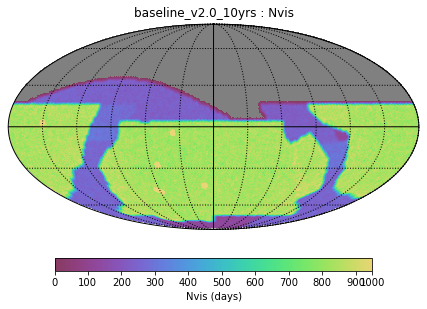

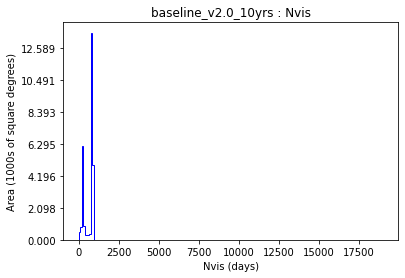

In [5]:
bd = maf.metricBundles.makeBundlesDictFromList(bundleList)
bg = maf.metricBundles.MetricBundleGroup(bd, conn, outDir=outDir, resultsDb=resultsDb)
bg.runAll()
bg.plotAll(closefigs=False)

In [6]:
# Results are stored in the bundleDict
bd

{'baseline_v2_0_10yrs_Nvis_HEAL': <rubin_sim.maf.metricBundles.metricBundle.MetricBundle at 0x7fceb45b3b80>}

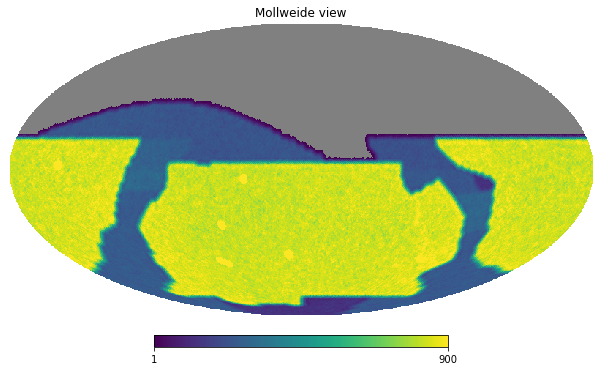

In [9]:
# can look at the results manually
hp.mollview(bd['baseline_v2_0_10yrs_Nvis_HEAL'].metricValues, max=900)